# Variáveis Discretas Aleatórias e Distribuições de Probabilidade

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dado uma variável aleatória discreta

Exemplo: os possíveis resultados alcançados ao se jogar 6 moedas não viciadas.

A distribuição de probabilidade pode ser visualizada no gráfico abaixo em que o eixo x representa a quantidade de sucessos(cara) e o eixo y a probabilidade de tal evento ocorrer

<AxesSubplot:>

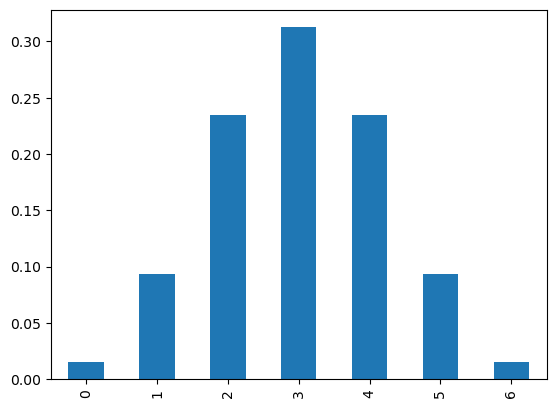

In [15]:
probs = []
for i in range(7):
    comb = (np.math.factorial(6) / np.math.factorial(6 - i)) / np.math.factorial(i)
    probs.append(comb / 2 ** 6)
probs = pd.Series(probs)
probs.plot.bar()

### Funções de massa de probabilidade

O cálculo feito para determinar a probabilidade de cada evento, é a função de massa de probabilidade.

Note que para ser denominada assim, ela deve seguir os seguintes critérios:

Sendo: 
* A, a variável que representa o evento em questão
* n, o número de eventos possíveis
* P(A), a probabilidade do evento A ocorrer 

$$ f(A) >= 0 $$

$$ \sum_{i=1}^{n}(Ai) = 1 $$

$$ f(A) = P(A) $$

### Funções de distribuição cumulativa

$$ F(x_{i}) <= F(x_{i+1}) $$

$$ F(x_{i})=\sum_{j=-\infty}^{i}P(X = x_{j}) $$

$$ 0 <= F(x) <= 1 $$


Veja os mesmos eventos do exemplo acima sendo mostrados a partir do ponto de vista da função de distribuição cumulativa

Em que o eixo x representa a quantidade de sucessos(cara) e o eixo y o valor de P(X<=x)

<AxesSubplot:>

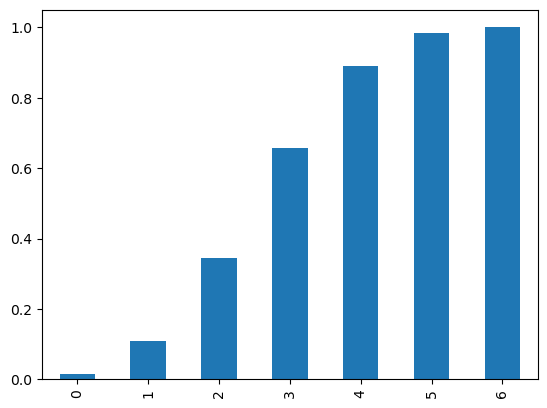

In [16]:
probs_cum = np.cumsum(probs)
probs_cum.plot.bar()

Note que a função de distribuição cumulativa vai de -inf. até +inf., mesmo que não esteja representada acima

Perceba também que:

 $$ P(X = x_{i}) = P(X <= x_{i}) - P(X <= x_{i - 1}) $$

 A probabilidade de termos 7 moedas é 0, isso fica claro no problema, mas é interessante reparar que o resultado da função de distribuição acumulativa para x=7 é 1, já que todos os resultado possíveis apresentam 7 ou menos sucessos(cara)

#### Média de uma variável aleatória discreta

A média de uma variável aleatória é uma média ponderada, utilizando as probabilidades como pesos.

$$E(X) = \sum_{i=1}^{n} x_{i}f(x_{i})$$

Por exemplo o valor esperado para o lançamento de 6 moedas seria de:

In [17]:
mu = 0
for i in range(7):
    mu += i * probs[i]
mu

3.0

#### Variância de uma variável aleatória discreta

A variância de uma variável aleatória utiliza como multiplicador o f(x) para cada distância quadrática possível

Note que $\mu$ nesse caso representa E(X), o valor esperado

$$V(X) = \sum_{i = 1}^{n} (x_{i} - \mu) ^ 2f(x_{i})$$

#### Valor esperado de uma função de uma variável aleatória

$$E[h(X)] = \sum_{i = 1} ^ {n} h(x_i)f(x_{i})$$

#### Variância de uma função de uma variável aleatória

$$V[X] = \sum_{i = 1}^{n} (h(x_{i}) - \mu)²f(x_{i})$$

Por exemplor: valor experado de h(x) = x², seria:
$$V[X] = \sum_{i = 1}^{n} (x_{i}² - \mu)²f(x_{i})$$

### Função de distribuição uniforme

$$ f(x) = \frac {1}{n} $$

Note que como as probabilidades de cada evento são iguais, estamos fazendo na verdade uma média aritimética, para calcular o valor esperado

$$ E[X] = \frac{\sum_{i = 1} ^ {n} x_{i}} n$$

$$V[X] = \frac{\sum_{i = 1}^{n} (x_{i} - \mu)²}{n}$$

#### Distribuição Binomial

Exemplo: Lançamento de 10 moedas, qual a probabilidade de se conseguir um número x de caras?

Esse problema, como todas distribuições binomiais, pode ser pensado como uma sequência de experimentos aleatórios e repetidos.

Cada tentativa então pode ser classificada como um sucesso ou uma falha, tendo como a variável aleatória o número de tentativas.

Se presume que p (probabilidade de sucesso) se mantém constante em todas as tentativas e que essas são independentes.

Assim a função de massa de probabilidade de uma distribuição binomial, como a do experimento das moedas é dada por:

$$P(X = x) = (_{n}^{x})p^x(1 - p)^{n - x}$$

Note que para um n fixo a simetria da distribuição aumenta quando p se aproxima de 0,5

### Valor esperado e variância

$$E[x] = np$$

$$\sigma² = np(1 - p)$$

In [2]:
def comb(n, x):
    return np.math.factorial(n) / (np.math.factorial(n - x) * np.math.factorial(x))

In [3]:
def pdf_binomial(n, p):
    P = []
    for x in range(n + 1):
        P.append(comb(n, x) * (p ** x * (1- p) ** (n - x)))
    return P

In [4]:
def binomial(x, n, p):
    return np.math.comb(n, x)*p**x*(1-p)**(n-x)

[Text(0.5, 1.0, 'Binomial')]

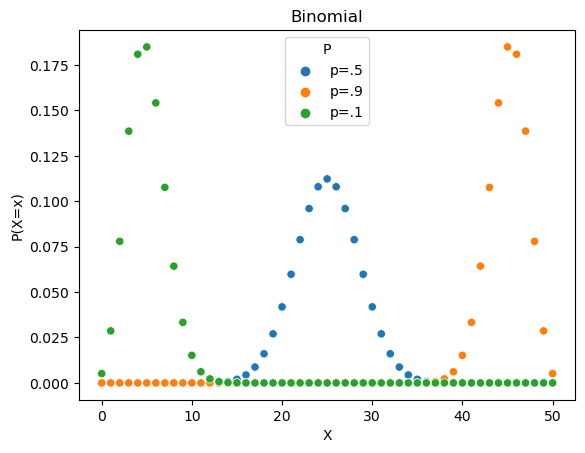

In [21]:
df_plots=pd.DataFrame(columns=['p=.5', 'p=.9', 'p=.1'])
df_plots['p=.5']=pdf_binomial(50, .5)
df_plots['p=.9']=pdf_binomial(50, .9)
df_plots['p=.1']=pdf_binomial(50, .1)
df_plots.reset_index(inplace=True)
df_melted=df_plots.melt(id_vars='index')
df_melted.columns=['X', 'P', 'P(X=x)']
sns.scatterplot(x=df_melted['X'], y=df_melted['P(X=x)'], hue=df_melted['P']).set(title='Binomial')

### Distribuição geométrica

Qual probabilidade da k-ésima ocorrencia de uma sequência de experimentos aleatórios, independentes e de probabilidade constante, ser o primeiro sucesso.

Exemplo: Qual a probabilidade da primeira cara(sucesso) ser alcançada na 10° jogada de uma moeda?

Essa probabilidade é dada pela função de massa de probabilidade da distribuição geométrica, que podemos ver a seguir:

$$  P(X = x) = (1 - p) ^ {(k - 1)}p $$

### Valor esperado e variância

$$ E[x] = \frac{1}{p}$$

$$\sigma² = \frac{(1 - p)}{p²}$$

In [22]:
def pdf_geometrica(k, p):
    return p * (1 - p) ** (k - 1)

[Text(0.5, 1.0, 'Geométrica')]

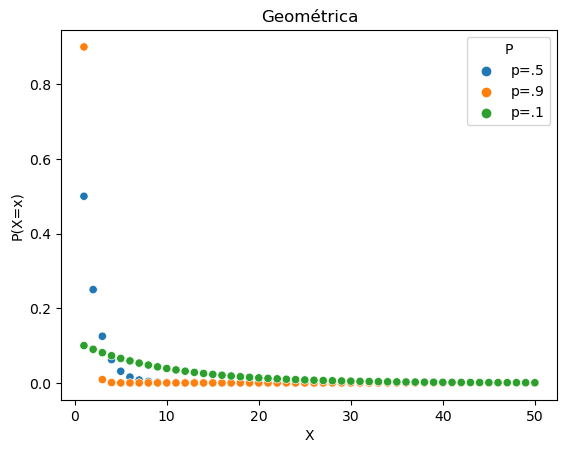

In [23]:
df_plots=pd.DataFrame(columns=['p=.5', 'p=.9', 'p=.1'])
df_plots['p=.5']=[pdf_geometrica(k, .5) for k in range(1, 51)]
df_plots['p=.9']=[pdf_geometrica(k, .9) for k in range(1, 51)]
df_plots['p=.1']=[pdf_geometrica(k, .1) for k in range(1, 51)]
df_plots.reset_index(inplace=True)
df_plots['index']=df_plots['index'].apply(lambda x: x+1)
df_melted=df_plots.melt(id_vars='index')
df_melted.columns=['X', 'P', 'P(X=x)']
sns.scatterplot(x=df_melted['X'], y=df_melted['P(X=x)'], hue=df_melted['P']).set(title='Geométrica')

### Propriedade da perda de memória

 $$ P(X=n+t|X>n)=P(X=t) $$

Isso significa que a probabilidade de x assumir o valor de n + t, dado que x já é maior que t, é a mesma de x assumir o valor de t

Exemplo: Dado que já houveram 100 tentativas(n), qual a probabilidade de conseguirmos um acerto na 104° tentativa(n+t)?

Considerando que as tentativas são independentes, a probabilidade de se conseguir o primeiro sucesso na 104° tentativa, dadas outras 100 tentativas que já ocorreram, é igual a probabilidade de se conseguir o primeiro sucesso na 4° tentativa.

 $$ P(X=100+4|X>100)=P(X=4) $$

### Distribuição binomial negativa

Dado um r (número de sucessos) e um x (tentativa em que ocorre o último sucesso), qual a probabilidade de o r-ésimo sucesso ser alcançado na x-ésima tentativa?

Essa probabilidade é dada pela função de massa de probabilidade da binomial negativa, que podemos ver a seguir:

$$P(X = x) = (_{x - 1}^{r - 1})(1 - p)^{x - r}p^r$$

Note que a fórmula pode ser interpretada como uma binomial de n = (x - 1) e x = (r - 1) multiplicada por p, que representa o último sucesso, ou seja, estamos delimitando a x-ésima tentiva à sucesso e multiplicando pela probabilidade de (r - 1) sucessos ocorrerem dentro das (x - 1) posições anteriores

Perceba que x não pode assumir um valor menor que r, já que não é possivel obter r sucessos em menos de r tentativas

É importante perceber que um binomial negativa pode ser interpretada como uma soma de r geométricas, até a ocorrência do último sucesso, portanto podemos deduzir o E[x] a partir disso, como sendo a soma dos valores esperados de r geométricas

### Valor esperado e variância

$$ E[x] = \sum_{i = 1}^{r} \frac{1}{p} = \frac{r}{p}$$

In [24]:
def binom_negativa(x, r, p):
    return np.math.comb(x - 1, r - 1)*(1-p)**(x-r)*p**r

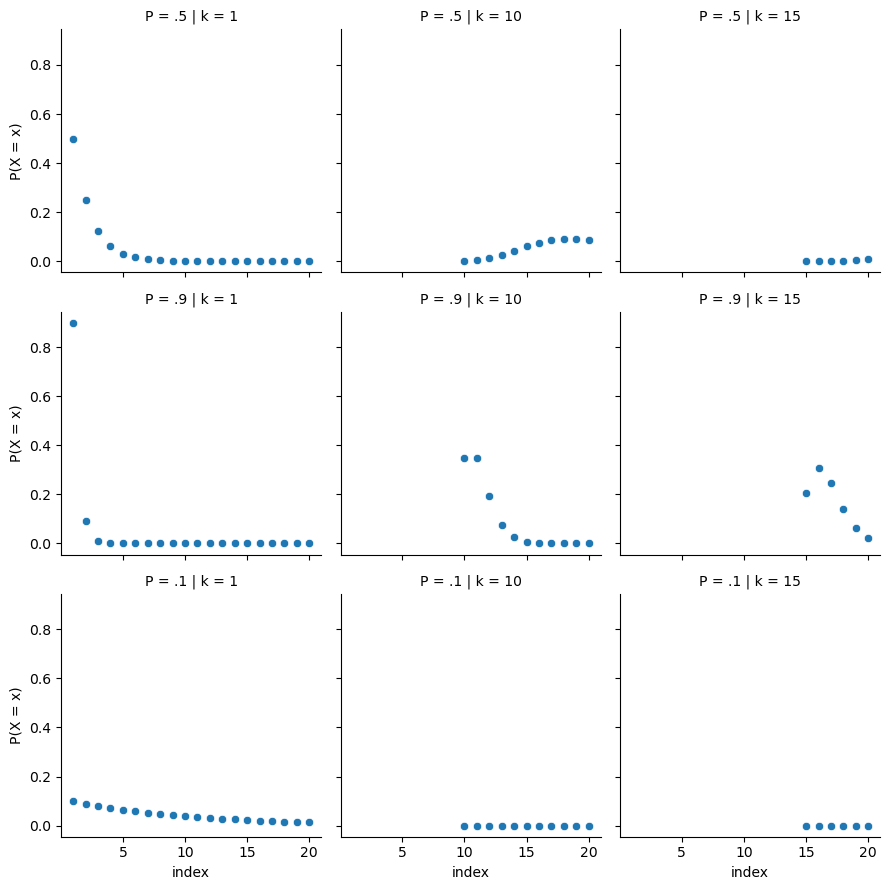

In [25]:
df_plots = pd.DataFrame(columns=['k', '.5', '.9', '.1'])
df_plots['k']=[1]*20+[10]*11+[15]*6
df_plots['.5']=[binom_negativa(x, 1, .5) for x in range(1, 21)]+[binom_negativa(x, 10, .5) for x in range(10, 21)]+[binom_negativa(x, 15, .5) for x in range(15, 21)]
df_plots['.9']=[binom_negativa(x, 1, .9) for x in range(1, 21)]+[binom_negativa(x, 10, .9) for x in range(10, 21)]+[binom_negativa(x, 15, .9) for x in range(15, 21)]
df_plots['.1']=[binom_negativa(x, 1, .1) for x in range(1, 21)]+[binom_negativa(x, 10, .1) for x in range(10, 21)]+[binom_negativa(x, 15, .1) for x in range(15, 21)]
df_plots.reset_index(inplace=True)
df_plots['index']=[i for i in range(1, 21)]+[i for i in range(10, 21)]+[i for i in range(15, 21)]
df_melted=df_plots.melt(id_vars=['index', 'k'])
df_melted.columns.values[-2:]=['P', 'P(X = x)']
grid=sns.FacetGrid(df_melted, col='k', row='P')
grid.map(sns.scatterplot, 'index', 'P(X = x)')

### Distribuição Hipergeométrica

Dada uma população de tamanho N, com K sucessos, qual a probabilidade de, em uma amostra de tamanho n, termos x sucessos, considenrando retiradas SEM reposição?

$$P(X = x) = \frac{(_{x}^{K})(_{n - x}^{N - K})}{(_{n}^{N})} $$

A fórmula acima representa a função de massa de probabilidade de uma distribuição hipergeométrica

Note que o valor máximo que X pode assumir é: n, caso n < K; e K, caso n > K.

Note que, quando n + K > N, então o valor mínimo de X é n + K - N, já que não há falhas o suficiente para preencher toda a amostra de tamanho n, sem que haja sucessos

##### Aproximação binomial para uma distribuição hipergeométrica

In [26]:
def hipergeo(x, n, N, K):
    return np.math.comb(K, x)*np.math.comb(N - K, n - x)/np.math.comb(N, n)

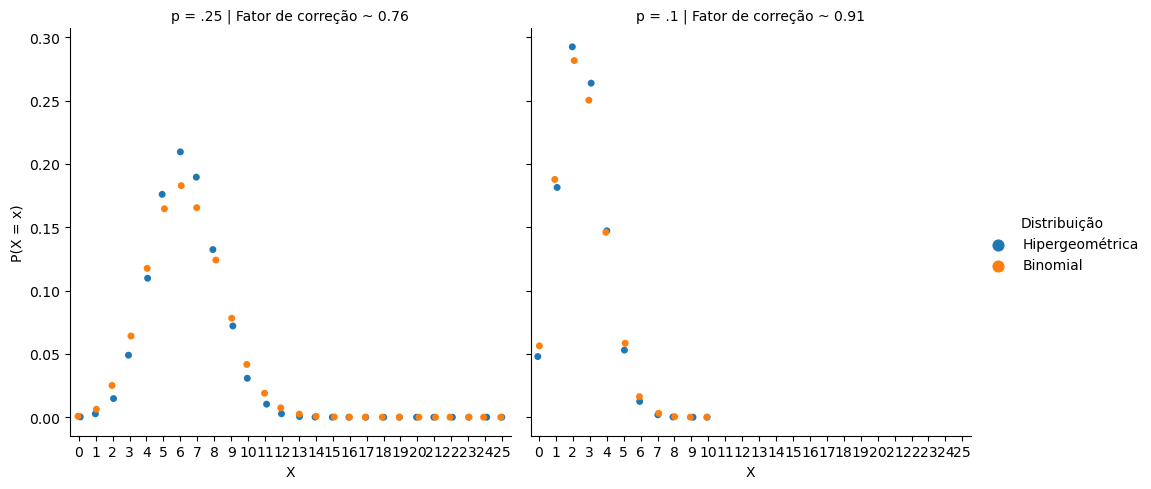

In [30]:
df_plots=pd.DataFrame(columns=['p', 'Hipergeométrica', 'Binomial'])
df_plots['p']=[f'.25 | Fator de correção ~ {round(75/99, 2) }']*26+[f'.1 | Fator de correção ~ {round(90/99, 2)}']*11
df_plots['Hipergeométrica']=[hipergeo(i, 25, 100, 25) for i in range(26)]+[hipergeo(i, 10, 100, 25) for i in range(11)]
df_plots['Binomial']=pdf_binomial(25, .25)+pdf_binomial(10, .25)
df_plots.reset_index(inplace=True)
df_plots['index']=[i for i in range(26)]+[i for i in range(11)]
df_melted=df_plots.melt(id_vars=['index', 'p'])
df_melted.columns=['X', 'p', 'Distribuição', 'P(X = x)']
sns.catplot(data=df_melted, x='X', y='P(X = x)',hue='Distribuição' ,col='p')

Perceba que o gráfico em que p = .1, sendo p interpretado como a proporção de sucessos dentro da população, para a hipergeométrica, apresenta uma aproximação muito mais fiel da binomial para a hípergeométrica

Isso ocorre devido ao fator de correção

$$ F = \frac{N - n}{N - 1} $$

Esse fator é utilizado para corrigir amostras de populações FINITAS (sem reposição), e está presente no cálculo da variância da hipergeométrica

### Valor esperado e variância

$$ E[X] = np $$

$$ V[X] = np(1- p)\frac{N - n}{N - 1} $$

Quanto mais próximo de 1 o fator de correção é, melhor é a aproximação da binomial para a hipergeométrica 

### Distribuição Poisson

Considere uma distribuição binomial em que, o tamanho da amostra tende a infinito e a probabilidade tende a 0, de modo que n vezes p permaneça constante, como ficará a sua função de densisade probabilidade?

$$ \lim_{n \to +\infty}P(X = x) = \frac{e^{-\lambda}\lambda^{x}}{x!}$$

A fórmula acima representa a função de massa de probabilidade de uma distribuição de poisson

##### Considere que:
Ao subdividirmos um intervalo T em microintervalos de tamanho delta(T), quando delta(T) tende a 0 temos:

A) $$ P(X > 1) \to 0 $$
B) $$ P(X = x) \to \lambda\frac{\Delta t}{T} $$
<p><center>Isso implica que, dado um valor esperado para um intervalo delta(t), conforme alteramos o valor de delta(t) a mudança no valor esperado é proporcional </center></p>

C) 
<h5><center>a ocorrência de um evento em um subintevalo é independente das outras </center></h5>

##### Caso essas propriedades sejam respeitadas, temos um processo de Poisson

### Valor esperado e variância

$$ E[X] = \lambda $$

$$ V[X] = \lambda $$

Note que o valor esperado e a variância, na distribuição de Poisson, são iguais, mas atente ao fato de que caso esses valores se distoem muito um do outro, a distribuição de Poission não terá uma representatividade significativa dos dados

In [6]:
def poisson(x, mu):
    return np.math.e**(-mu)*mu**x/np.math.factorial(x)

<AxesSubplot:xlabel='X', ylabel='P(X = x)'>

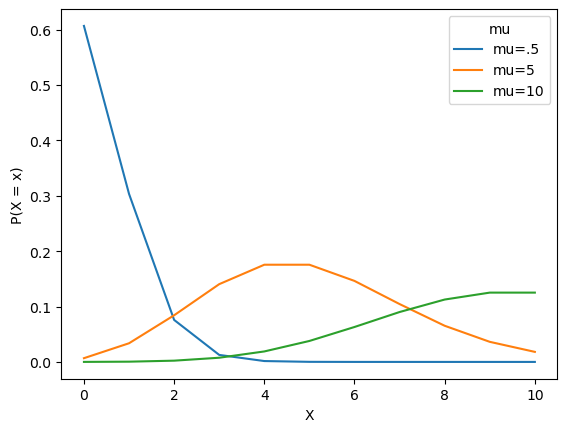

In [32]:
df_plots=pd.DataFrame(columns=['mu=.5', 'mu=5', 'mu=10'])
df_plots['mu=.5']=[poisson(x, .5) for x in range(11)]
df_plots['mu=5']=[poisson(x, 5) for x in range(11)]
df_plots['mu=10']=[poisson(x, 10) for x in range(11)]
df_plots.reset_index(inplace=True)
df_melted=df_plots.melt(id_vars='index')
df_melted.columns=['X', 'mu', 'P(X = x)']
sns.lineplot(data=df_melted, x='X', y='P(X = x)', hue='mu')

O gráfico em linhas foi usado apenas para favorecer a visualização, a váriavel X, permanece discreta

<AxesSubplot:xlabel='X', ylabel='P(X = x)'>

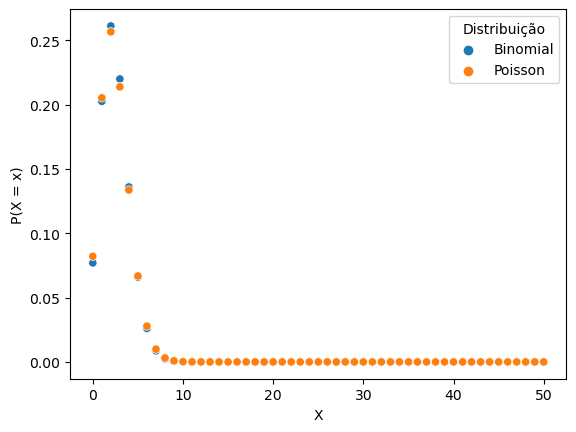

In [16]:
df_plots=pd.DataFrame(columns=['Binomial', 'Poisson'])
df_plots['Poisson']=[poisson(x, 2.5) for x in range(51)]
df_plots['Binomial']=pdf_binomial(50, .05)
df_plots.reset_index(inplace=True)
df_melted=df_plots.melt(id_vars='index')
df_melted.columns=['X', 'Distribuição', 'P(X = x)']
sns.scatterplot(data=df_melted, x='X', y='P(X = x)', hue='Distribuição')

Dado um valor de n, significantemente maior que a proporção de p, em uma distribuição binomial, a distribuição de Poisson pode apresentar uma boa aproximação, os valores de limite divergem de acordo com a literatura, mas um bom referencial pode ser, caso:
$$ n > 20 $$ 
$$ p < 0.05$$